In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_mistralai.chat_models import ChatMistralAI


# Define state
class State(TypedDict):
    """
    Messages have the type "list". The `add_messages` function
    in the annotation defines how this state key should be updated
    (in this case, it appends messages to the list, rather than overwriting them)
    """

    messages: Annotated[list, add_messages]

# Initialize StateGraph
graph_builder = StateGraph(State)

# Initializing LLM
llm = ChatMistralAI(mistral_api_key='')


# define chatbot
def chatbot(state: State):
    print("chatbot...")
    print(state["messages"])
    response=llm.invoke(state["messages"])
    print(f"LLM Response: {response}\n")
    return {"messages": [response]}

"""
-The first argument is the unique node name
-The second argument is the function or object that will be called whenever the node is used.
"""
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# compile the graph
graph = graph_builder.compile()


# stream updates
def stream_graph_updates(user_input: str):
    print('stream_graph_updates...')
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        print(f"Event: {event}\n")
        for value in event.values():
            print(f"Value: {value}\n")
            print("Assistant:", value["messages"][-1].content)


for question in ['What is Gen AI?','What is Data Science?']:
    print(f"{question}\n")
    stream_graph_updates(question)

What is Gen AI?

stream_graph_updates...
chatbot...
[HumanMessage(content='What is Gen AI?', additional_kwargs={}, response_metadata={}, id='ad9063fe-2200-47ae-a4fa-ed1af930c273')]
LLM Response: content="Gen AI, or Generative Artificial Intelligence, refers to a type of artificial intelligence that can create new content, such as text, images, music, or video, that has not been seen before. It uses machine learning models, such as generative adversarial networks (GANs) or transformer models, to generate this content by learning patterns and structures from large datasets.\n\nGenerative AI can be used for a variety of applications, such as creating realistic images for use in video games or movies, generating personalized product recommendations based on user preferences, or even composing music. However, it also raises ethical concerns, such as the potential for misuse in generating deepfakes or other forms of disinformation.\n\nIt's important to note that Gen AI is still an evolving f

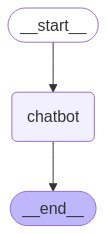

In [12]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [8]:
# while True:
#     try:
#         user_input = input("User: ")
#         if user_input.lower() in ["quit", "exit", "q"]:
#             print("Goodbye!")
#             break

#         stream_graph_updates(user_input)
#     except:
#         # fallback if input() is not available
#         user_input = "What do you know about LangGraph?"
#         print("User: " + user_input)
#         stream_graph_updates(user_input)
#         break